In [226]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from IPython.display import Image 
%matplotlib inline 

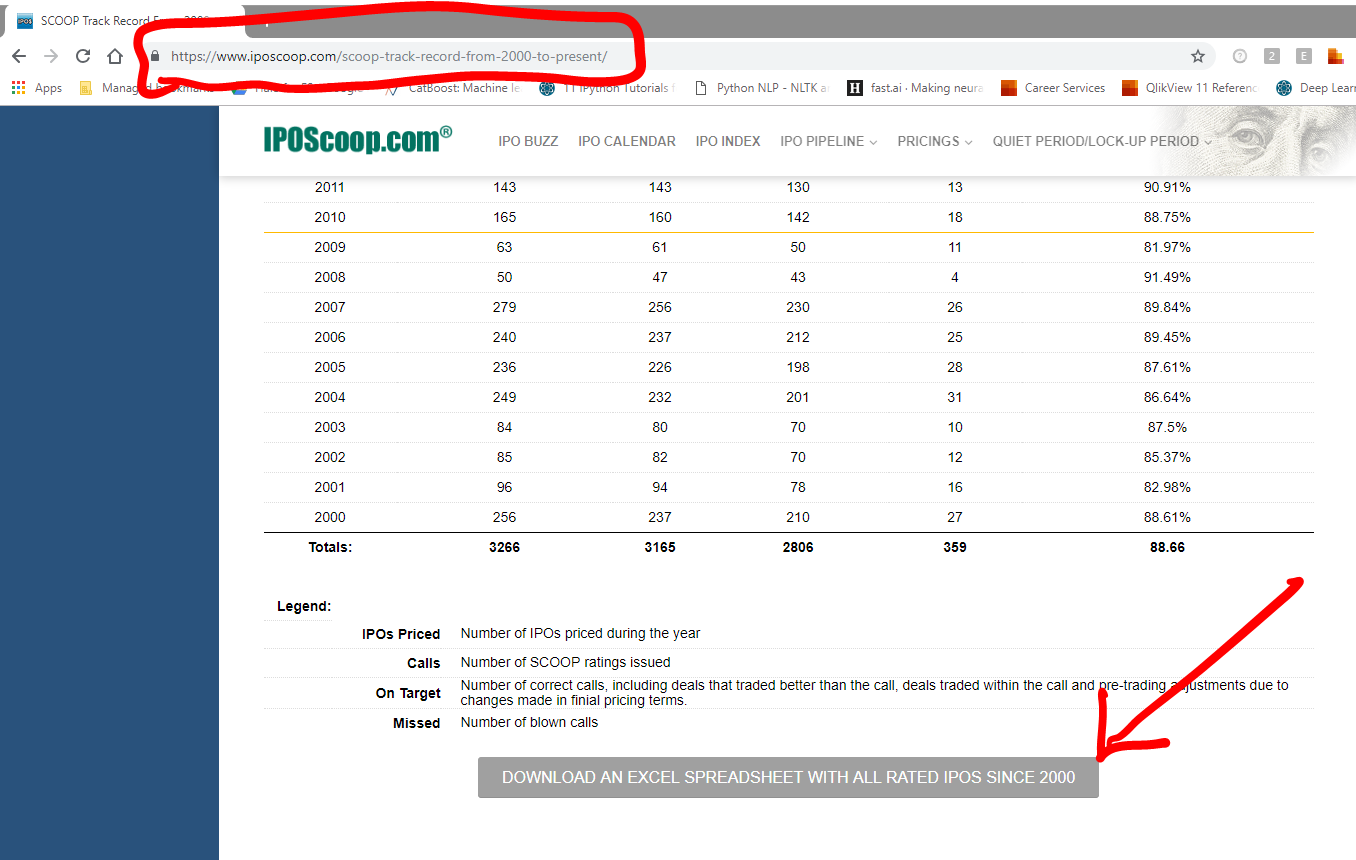

In [367]:
Image('C:/Users/asingh368/Desktop/POC/Data/DataSource.PNG')

In [227]:
ipoDF = pd.read_csv(r'C:/Users/asingh368/Desktop/POC/Data/ipoData2000.csv', encoding='latin-1')

## Basic Data Cleanup 
#### Dollar and percentage signs 
#### Data Types of Columns 

In [228]:
ipoDF2 = ipoDF.copy()

In [366]:
ipoDF = ipoDF.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipoDF = ipoDF.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipoDF = ipoDF.applymap(lambda x: x if not '(' in str(x) else x.replace('(',''))
ipoDF = ipoDF.applymap(lambda x: x if not ')' in str(x) else x.replace(')',''))

In [230]:
ipoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
Date                3207 non-null object
Issuer              3207 non-null object
Symbol              3207 non-null object
Managers            3207 non-null object
Offer Price         3207 non-null object
Opening Price       3207 non-null object
1st Day Close       3207 non-null object
1st Day % Change    3206 non-null object
Change Opening      3207 non-null object
Change Closing      3207 non-null object
Star Ratings        3207 non-null object
Performed           381 non-null object
dtypes: object(12)
memory usage: 300.7+ KB


In [231]:
ipoDF.replace('N/C',0,inplace=True)

In [232]:
ipoDF['Date'] = pd.to_datetime(ipoDF['Date'])
ipoDF['Offer Price'] = ipoDF['Offer Price'].astype('float')
ipoDF['Opening Price'] = ipoDF['Opening Price'].astype('float')
ipoDF['1st Day Close'] = ipoDF['1st Day Close'].astype('float')
ipoDF['1st Day % Change'] = ipoDF['1st Day % Change'].astype('float')
ipoDF['Change Closing']= ipoDF['Change Closing'].astype('float')
ipoDF['Change Opening']= ipoDF['Change Opening'].astype('float')
ipoDF['Star Ratings'] = ipoDF['Star Ratings'].astype('int')

ValueError: ('Unknown string format:', 'Date')

### We observe that there is some bad data in our data frame which is throwing error. We will now resolve this by dropping the rows from the Data frame 

In [233]:
ipoDF[ipoDF['Date']=='Date']

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,Star Ratings,Performed
209,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
391,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
498,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
672,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
961,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
1192,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
1339,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
1483,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
1644,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed
1706,Date,Issuer,Symbol,Managers,Price,Price,Close,Px Chng,Opening,Close,Ratings,Performed


In [234]:
ipoDF = ipoDF.drop(ipoDF[ipoDF.Date == 'Date'].index)

In [235]:
ipoDF[ipoDF['Date']=='Date']

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,Star Ratings,Performed


In [236]:
ipoDF['Date'] = pd.to_datetime(ipoDF['Date'])
ipoDF['Offer Price'] = ipoDF['Offer Price'].astype('float')
ipoDF['Opening Price'] = ipoDF['Opening Price'].astype('float')
ipoDF['1st Day Close'] = ipoDF['1st Day Close'].astype('float')
ipoDF['1st Day % Change'] = ipoDF['1st Day % Change'].astype('float')
ipoDF['Change Closing']= ipoDF['Change Closing'].astype('float')
ipoDF['Change Opening']= ipoDF['Change Opening'].astype('float')
ipoDF['Star Ratings'] = ipoDF['Star Ratings'].astype('int')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

### Now we can see that one of the dates is not in the correct format using the Exception Trace we can see it is the value 120-11-01 and we can fix the value to a proper date or drop the value 
### We will set the value to a proper date 11/20/2012 & then reperform the Data type conversions

In [237]:
ipoDF[ipoDF['Date']=='11/120']

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,Star Ratings,Performed
1329,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [238]:
ipoDF.loc[1329,'Date'] = '2012-11-20'

In [239]:
ipoDF['Date'] = pd.to_datetime(ipoDF['Date'])
ipoDF['Offer Price'] = ipoDF['Offer Price'].astype('float')
ipoDF['Opening Price'] = ipoDF['Opening Price'].astype('float')
ipoDF['1st Day Close'] = ipoDF['1st Day Close'].astype('float')
ipoDF['1st Day % Change'] = ipoDF['1st Day % Change'].astype('float')
ipoDF['Change Closing']= ipoDF['Change Closing'].astype('float')
ipoDF['Change Opening']= ipoDF['Change Opening'].astype('float')
ipoDF['Star Ratings'] = ipoDF['Star Ratings'].astype('int')

### Once the data types are fixed we start our Exploratory Data analysis

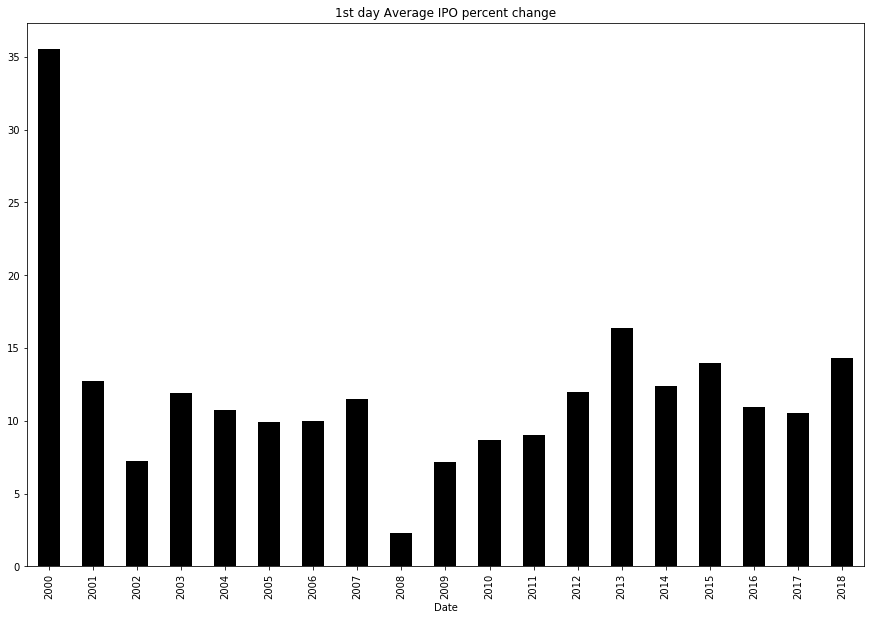

In [240]:
ipoDF.groupby(ipoDF['Date'].dt.year)['1st Day % Change']\
.mean().plot(kind='bar', figsize=(15,10), color= 'k', title='1st day Average IPO percent change')

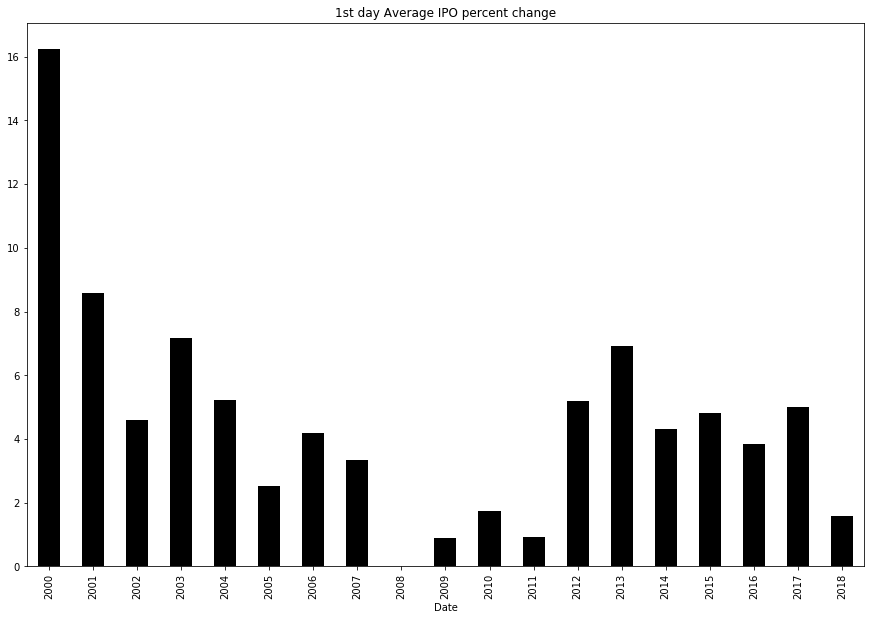

In [241]:
ipoDF.groupby(ipoDF['Date'].dt.year)['1st Day % Change']\
.median().plot(kind='bar', figsize=(15,10), color= 'k', title='1st day Average IPO percent change')

## Observing the Mean VS Median Graph we can see that the Mean values are skewed by some large outliers 

In [242]:
ipoDF['1st Day % Change'].describe()

count    3188.000000
mean       13.170862
std        27.353136
min       -41.080000
25%         0.000000
50%         4.455000
75%        19.085000
max       353.850000
Name: 1st Day % Change, dtype: float64

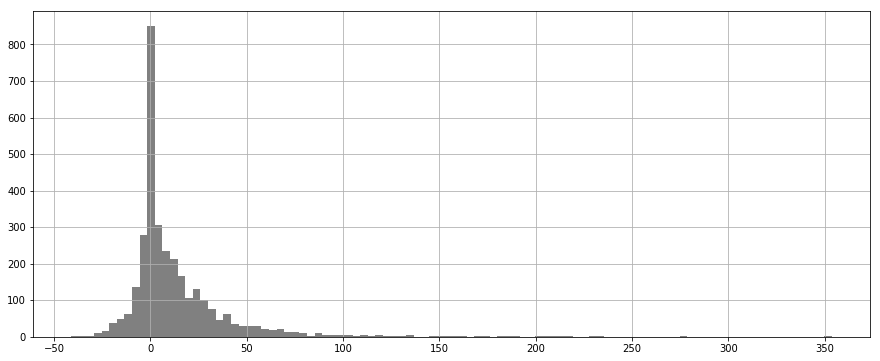

In [243]:
ipoDF['1st Day % Change'].hist(figsize=(15,6), bins=100, color='grey')

### We can see most of the returns are clustered around 0 but there is a long tail to the right which are the real IPO return winners 

### Do all the gains go to who get in on the offering or is there a chance to capture an outsized return on the first day ?

In [244]:
# Creating two new columns that capture the change from open to close & percentage change for the same 
ipoDF['$ Change Open to Close']= ipoDF['Change Closing'] - ipoDF['Change Opening']
ipoDF['Percentage Change Open2Close'] = (ipoDF['$ Change Open to Close']/ipoDF['Opening Price']) * 100

In [245]:
ipoDF['Percentage Change Open2Close'].describe()

count    3189.000000
mean        1.299314
std        11.080593
min       -98.522167
25%        -2.900886
50%         0.000000
75%         4.000000
max       159.417476
Name: Percentage Change Open2Close, dtype: float64

### -98% looks suspicious that an IPO can fall 98% seems unrealistic 


In [246]:
ipoDF[ipoDF['Percentage Change Open2Close']< -51]

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,Star Ratings,Performed,$ Change Open to Close,Percentage Change Open2Close
2296,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.0,-98.522167


In [247]:
ipoDF.loc[2296, 'Opening Price'] = ipoDF.loc[2296, 'Offer Price']

In [248]:
ipoDF['$ Change Open to Close']= ipoDF['Change Closing'] - ipoDF['Change Opening']
ipoDF['Percentage Change Open2Close'] = (ipoDF['$ Change Open to Close']/ipoDF['Opening Price']) * 100
ipoDF['Percentage Change Open2Close'].describe()

count    3189.000000
mean        1.298851
std        11.084800
min      -100.000000
25%        -2.900886
50%         0.000000
75%         4.000000
max       159.417476
Name: Percentage Change Open2Close, dtype: float64

In [249]:
ipoDF[ipoDF['Issuer'] == 'Duluth Holdings']

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,Star Ratings,Performed,$ Change Open to Close,Percentage Change Open2Close
668,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,-6.85,1.36,1,NaN,8.21,159.417476


In [250]:
ipoDF.loc[668, 'Opening Price'] = ipoDF.loc[668, 'Offer Price']

In [251]:
ipoDF['Change Opening'] = ipoDF['Opening Price'] - ipoDF['Offer Price']
ipoDF['Change Closing'] = ipoDF['1st Day Close'] - ipoDF['Offer Price']
ipoDF['$ Change Open to Close']= ipoDF['Change Closing'] - ipoDF['Change Opening']
ipoDF['Percentage Change Open2Close'] = (ipoDF['$ Change Open to Close']/ipoDF['Opening Price']) * 100
ipoDF['Percentage Change Open2Close'].describe()

count    3189.000000
mean        1.242431
std        10.415425
min       -49.281222
25%        -2.912621
50%         0.000000
75%         3.974563
max       113.333333
Name: Percentage Change Open2Close, dtype: float64

### Clean the code above 
### Create a histogram for Opening to Closing prices 
### We can see that the distribution is more normally distributed 

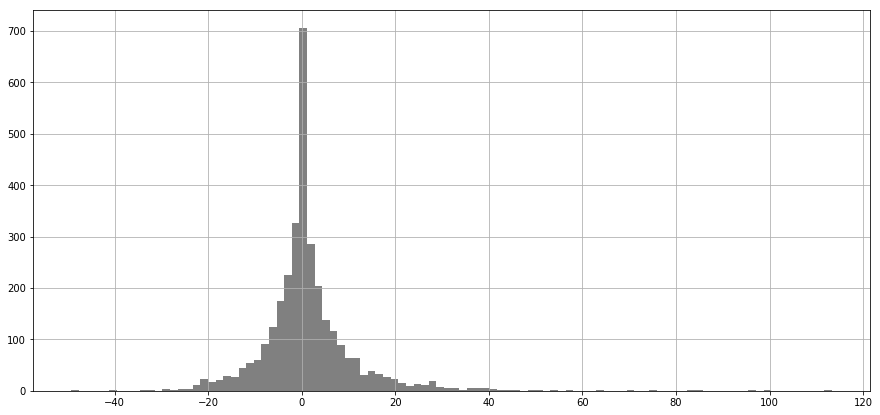

In [252]:
ipoDF['Percentage Change Open2Close'].hist(figsize=(15,7), bins = 100, color='grey')

## For our analysis lets consider the data from 2015 - year to date 

### Exploring the 2015 - YTD data distribution 

In [253]:
ipoDF[ipoDF['Date'] >= '2015-01-01']['$ Change Open to Close'].describe()

count    669.000000
mean       0.150792
std        2.031040
min       -6.260000
25%       -0.620000
50%        0.000000
75%        0.540000
max       20.040000
Name: $ Change Open to Close, dtype: float64

### Adding up all the price changes from 2015 - YTD this includes both Winners & Loosers 

In [254]:
ipoDF[ipoDF['Date'] >= '2015-01-01']['$ Change Open to Close'].sum()

100.88

### Analysing the winners alone 
#### Assuming a simple rule for winning that the closing price was more than the opening price i.e. Investor did not loose any money 
#### We can observe that the minimum value for the Difference between Opening and closing Prices is 1 cent or Nearly Zero

In [255]:
ipoDF[(ipoDF['Date']>='2015-01-01')&(ipoDF['$ Change Open to Close']> 0)]['$ Change Open to Close'].describe()

count    307.000000
mean       1.375147
std        2.177512
min        0.010000
25%        0.150000
50%        0.650000
75%        1.680000
max       20.040000
Name: $ Change Open to Close, dtype: float64

### Analyzing loosers alone 
#### We can observe that maximum value lost in a stock is 6 Dollars and 26 cents 
#### And average loss for the investor had he invested in all the loosing stocks would be a little over 1 dollar 

In [256]:
ipoDF[(ipoDF['Date']>='2015-01-01')&(ipoDF['$ Change Open to Close']< 0)]['$ Change Open to Close'].describe()

count    314.000000
mean      -1.023217
std        1.145321
min       -6.260000
25%       -1.357500
50%       -0.655000
75%       -0.200000
max       -0.010000
Name: $ Change Open to Close, dtype: float64

# Summary of the Exploratory Data Analysis 
## If we observe the Winners and Loosers we can conclude that nearly half of the IPOs launched since 2015 are loosers and other half is the winner 
## If we invested in all the 669 IPOs launched since 2015 we still would have come out ahead winning on a few and loosing on a few 
## And this is excluding the commission and transaction cost 


## ========================================================================

# Phase 2 
# Our goal now is to build a ML model to find which IPOs are better investment options in comparison to others 
## Step one in solving that problem is to find out what factors influence the price of an IPO
## These Features can be a good indicator on how the IPOs will perform 
### Examples of features : Recent performance of the market, Prestige of the underwriters, timing of the IPO launch (Day of the week, Month of the year) etc. 

### SP 500 is good indicator of market performance so we will be using S&P 500 data to create a new feature for our data model 

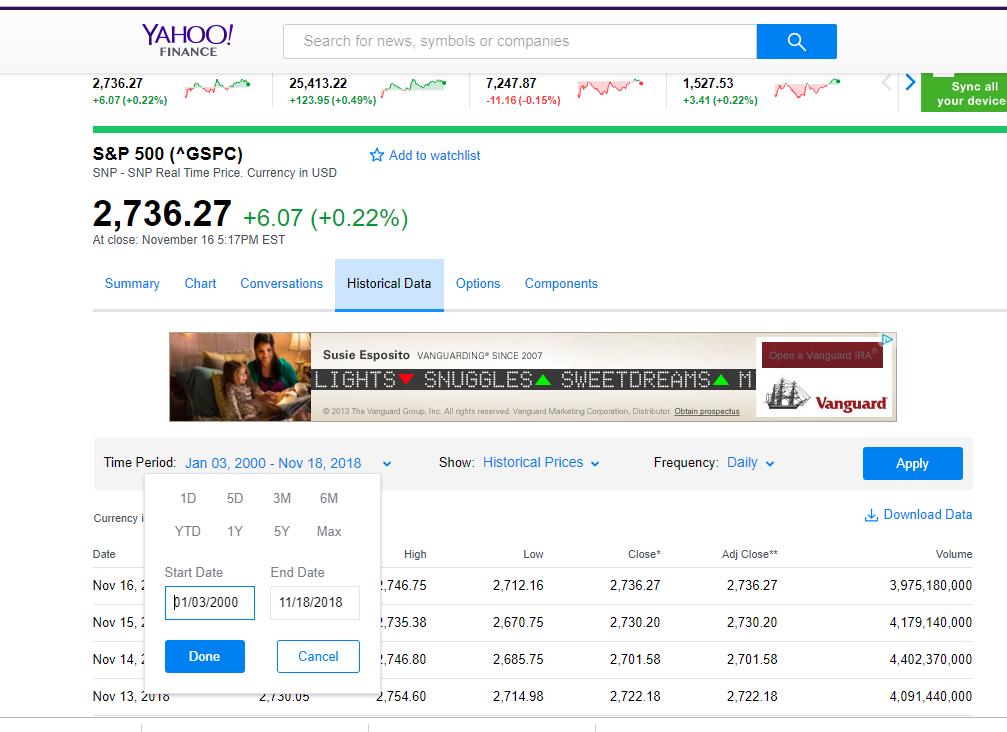

In [257]:
Image("C:/Users/asingh368/Desktop/POC/Data/Yahoo_filter.png")

In [258]:
sp500_DF = pd.read_csv('C:/Users/asingh368/Desktop/POC/Data/YahooFinanceYTD_Data.csv', encoding='latin-1')
sp500_DF['Date'] = pd.to_datetime(sp500_DF['Date'])

In [259]:
sp500_DF.sort_values('Date', inplace=True)
sp500_DF.reset_index(drop=True, inplace=True)
sp500_DF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000


### We will create a function to find the weekly trend of the IPO launch dates and weeks 
### we will then calculate the weekly trend for the launch weeks of each IPO 

In [267]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx = sp500_DF[sp500_DF['Date'] == str(ipo_dt.date())].index[0] - 1 
        week_ago_idx = sp500_DF[sp500_DF['Date'] == str(ipo_dt.date())].index[0] - 8 
        chg = (sp500_DF.iloc[day_ago_idx]['Close'] - sp500_DF.iloc[week_ago_idx]['Close'])/(sp500_DF.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [268]:
ipoDF['SP Week Change'] = ipoDF['Date'].map(get_week_chg)

error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


## We find that four dates have been thrown in the exception when we dig further we find that these are incorrect dates for the IPOs 
## 2015-02-21, 2013-11-16, 2009-08-01 - are all saturdays and the market is closed on a Saturday 
## Resolution : the IPOs had incorrect dates as their launch dates 
## After fixing these issues we will re run the function 

In [270]:
ipoDF.loc[526, 'Date'] = pd.to_datetime('2015-05-21')
ipoDF.loc[527, 'Date'] = pd.to_datetime('2015-05-21')
ipoDF.loc[1660, 'Date'] = pd.to_datetime('2009-08-12')
ipoDF.loc[1157, 'Date'] = pd.to_datetime('2012-11-20')


In [271]:
ipoDF['SP Week Change'] = ipoDF['Date'].map(get_week_chg)

## Now we will add the SP percent Change from the close previous day to the next day of opening 

## We will define a similar function calculating this value 

In [274]:
def get_closeToOpen_Change(ipo_dt):
    try:
        today_open_idx = sp500_DF[sp500_DF['Date']== str(ipo_dt.date())].index[0]
        yday_close_idx = sp500_DF[sp500_DF['Date']== str(ipo_dt.date())].index[0] -1 
        chg = (sp500_DF.iloc[today_open_idx]['Open'] - sp500_DF.iloc[yday_close_idx]['Close'])/(sp500_DF.iloc[yday_close_idx]['Close'])
        return chg * 100 
    except:
        print('Error', ipo_dt.date())

In [276]:
ipoDF['SP Close2Open Change %'] = ipoDF['Date'].map(get_closeToOpen_Change)

In [279]:
ipoDF['Lead Mgr'] = ipoDF['Managers'].map(lambda x:x.split('/')[0])
ipoDF['Lead Mgr'] = ipoDF['Lead Mgr'].map(lambda x: x.strip())

## Total Firms signifies the number of firms offering the IPO 
## We will also add the Day and Month of the year as a feature for the IPO 

In [284]:
ipoDF['Total Firms'] = ipoDF['Managers'].map(lambda x: len(x.split('/')))

In [285]:
ipoDF['Week Day'] = ipoDF['Date'].dt.dayofweek.map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipoDF['Month'] = ipoDF['Date'].map(lambda x:x.month)
ipoDF['Month'] = ipoDF['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',\
     8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [286]:
ipoDF.columns

Index(['Date', 'Issuer', 'Symbol', 'Managers', 'Offer Price', 'Opening Price',
       '1st Day Close', '1st Day % Change', 'Change Opening', 'Change Closing',
       'Star Ratings', 'Performed', '$ Change Open to Close',
       'Percentage Change Open2Close', 'SP Week Change',
       'SP Close2Open Change %', 'Lead Mgr', 'Total Firms', 'Week Day',
       'Month'],
      dtype='object')

In [287]:
ipoDF['GAP open %'] = (ipoDF['Change Opening'].astype('float')/ipoDF['Opening Price'].astype('float')) * 100
ipoDF['Open to Close %'] = (ipoDF['Change Closing'].astype('float') - \
                           ipoDF['Change Opening'].astype('float'))/ ipoDF['Opening Price'].astype('float') * 100

## Using Patsy library to convert our original data frame into a matrix where categorical variables are represented as number signifying their presence 1 - present , 0 - not present 
## Simillarly we can do the same thing for other categorical variables 
## Patsy also converts the categorical features in (n-1) format , i.e. it uses one value of the categorical feature as baseline to compare others 
## Patsy library by default adds intercept column and is helpful in regression models 


In [288]:
from patsy import dmatrix

In [293]:
X = dmatrix('Month + Q("Week Day") + Q("Total Firms") + Q("GAP open %") + Q("Change Opening") + Q("Lead Mgr") +\
Q("Offer Price") + Q("Opening Price") + Q("SP Close2Open Change %") + \
Q("SP Week Change")', data= ipoDF, return_type='dataframe')

In [365]:
#X

# ==============================================================

# Phase 3 
## Logistic Regression (Binary Classification) [0 or 1] - The problem we are trying to solve or predict is whether to buy an IPO stock given the information we already have ?

## Training and test split : - This is a time based model so instead of splitting the model randomly we will be splitting the data based on time and will be using the data prior to 2015 as Train and Everything from Jan 2015 as Test 

In [339]:
# Finding the point where Novemeber 2015 data starts 
ipoDF[ipoDF['Date'] < '2015-01-01']

,Date,Issuer,Symbol,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Change,Change Opening,Change Closing,...,$ Change Open to Close,Percentage Change Open2Close,SP Week Change,SP Close2Open Change %,Lead Mgr,Total Firms,Week Day,Month,GAP open %,Open to Close %
673,2014-01-10,GlycoMimetics,GLYC,Jefferies/ Barclays,8.00,10.40,9.01,12.63,2.40,1.01,...,-1.39,-13.365385,-0.159687,0.105001,Jefferies,2,Fri,Jan,23.076923,-13.365385
674,2014-01-15,"Cypress Energy Partners, L.P.",CELP,Raymond James/ Baird/ Stifel,20.00,20.00,21.30,6.50,0.00,1.30,...,1.30,6.500000,0.410076,0.089186,Raymond James,3,Wed,Jan,0.000000,6.500000
675,2014-01-16,American Capital Senior Floating,ACSF,Morgan Stanley/ Citigroup/ Deutsche Bank Secur...,15.00,13.25,13.38,-10.80,-1.75,-1.62,...,0.13,0.981132,1.182961,-0.021100,Morgan Stanley,5,Thurs,Jan,-13.207547,0.981132
676,2014-01-17,CHC Group Ltd.,HELI,J.P. Morgan/ Barclays/ UBS Investment Bank,10.00,9.30,9.80,-2.00,-0.70,-0.20,...,0.50,5.376344,0.435829,-0.089931,JP Morgan,3,Fri,Jan,-7.526882,5.376344
677,2014-01-17,EP Energy,EPE,Credit Suisse/ J.P. Morgan/ Citigroup/ Goldman...,20.00,19.90,18.08,-9.60,-0.10,-1.92,...,-1.82,-9.145729,0.435829,-0.089931,CSFB,10,Fri,Jan,-0.502513,-9.145729
678,2014-01-17,Hennessy Capital Acquisition (HCACU) (u),HCACU,Deutsche Bank Securities,10.00,10.00,10.02,0.20,0.00,0.02,...,0.02,0.200000,0.435829,-0.089931,Deutsche Bank,1,Fri,Jan,0.000000,0.200000
679,2014-01-17,RSP Permian,RSPP,"Barclays/ J.P. Morgan/ Tudor, Pickering, Holt/...",19.50,20.50,20.15,3.33,1.00,0.65,...,-0.35,-1.707317,0.435829,-0.089931,Barclays,6,Fri,Jan,4.878049,-1.707317
680,2014-01-23,Santander Consumer USA Holdings,SC,Citigroup/ J.P. Morgan/BofA Merrill Lynch/ Deu...,24.00,25.75,25.28,5.33,1.75,1.28,...,-0.47,-1.825243,0.135151,-0.139303,Citigroup,13,Thurs,Jan,6.796117,-1.825243
681,2014-01-24,Care.com,CRCM,Morgan Stanley/ BofA Merrill Lynch/ J.P. Morgan,17.00,21.21,24.30,42.94,4.21,7.30,...,3.09,14.568600,0.509016,-0.082036,Morgan Stanley,3,Fri,Jan,19.849128,14.568600
682,2014-01-24,Rice Energy,RICE,Barclays/ Citigroup/ Goldman Sachs/ Wells Farg...,21.00,21.90,21.90,4.29,0.90,0.90,...,0.00,0.000000,0.509016,-0.082036,Barclays,6,Fri,Jan,4.109589,0.000000


### We can see that the index for Data before starts from 673

### Additionally we are also giving our correct classification to the Data based on minimum 1 dollar +ve change from Open to Close. If an IPO opened at 10.50 and closed at minimum 11.50 it is a buy otherwise not 
### We took this step so we could get the long tail winners from our Exploratory analysis and not just any positive closes 

In [341]:
X_train , X_test = X[673:], X[:673]
y_train = ipoDF['$ Change Open to Close'][673:].map(lambda x: 1 if x>=1 else 0)
y_test = ipoDF['$ Change Open to Close'][:673].map(lambda x: 1 if x>= 1 else 0)

## Flashback from exploratory data analysis 

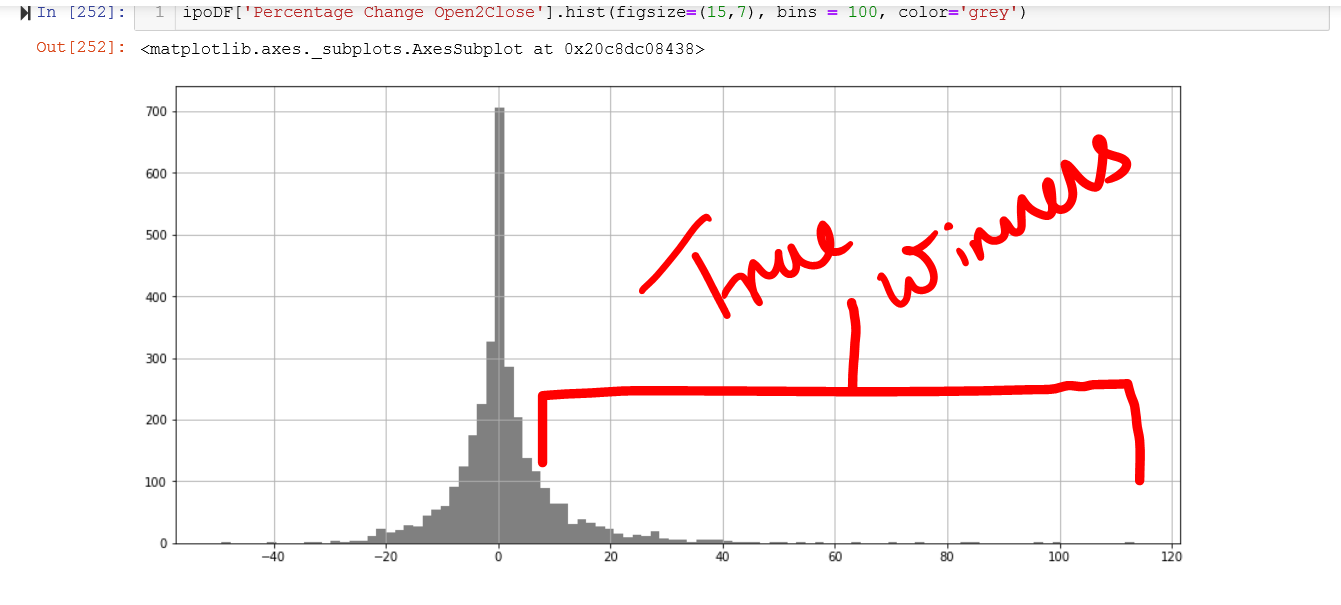

In [342]:
Image('C:/Users/asingh368/Desktop/POC/Data/EDA_Winners.PNG')

## Initializing the model 

In [343]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [344]:
clf.score(X_test, y_test)

0.8216939078751857

### Model accuracy shows 82% correctly classified but this can be misleading as the number of IPOs that gained more than one dollar is very low 

In [349]:
ipoDF[(ipoDF['Date'] >= '2015-01-01')]['$ Change Open to Close'].describe()

count    669.000000
mean       0.150792
std        2.031040
min       -6.260000
25%       -0.620000
50%        0.000000
75%        0.540000
max       20.040000
Name: $ Change Open to Close, dtype: float64

In [350]:
pred_label = clf.predict(X_test)
results = []
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipoDF.ix[y_test.index]['$ Change Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

resultsDF = pd.DataFrame(results, columns=['index', '$ Change', 'Predicted', 'actual', 'correct'])

C:\Users\asingh368\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [351]:
#resultsDF

In [352]:
resultsDF[resultsDF['Predicted']==1]['$ Change'].describe()

count    21.000000
mean      2.071429
std       5.480299
min      -3.000000
25%      -1.420000
50%       0.000000
75%       4.050000
max      20.040000
Name: $ Change, dtype: float64

Text(0.5,0,'Index')

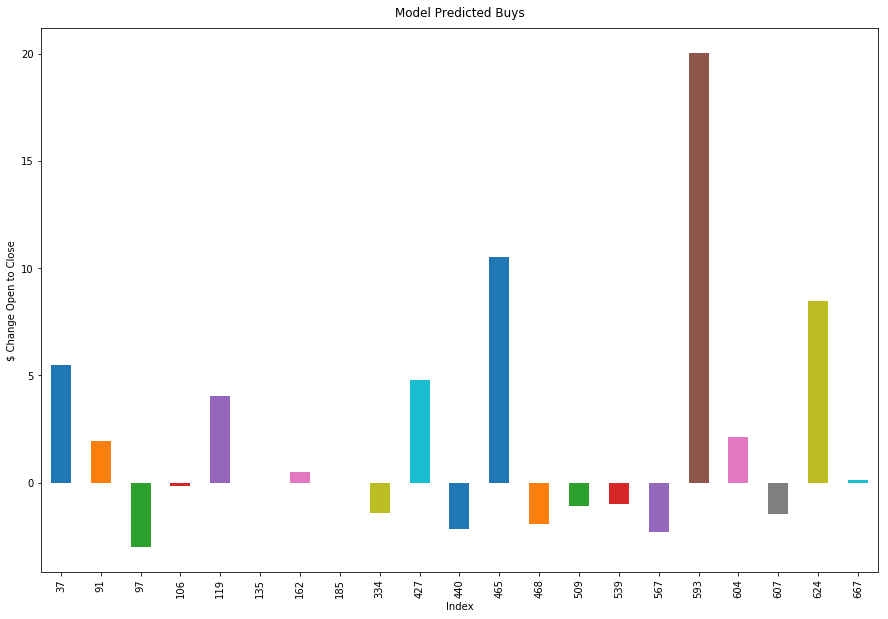

In [353]:
fig, ax = plt.subplots(figsize=(15,10))
resultsDF[resultsDF['Predicted']==1]['$ Change'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y= 1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

## Validating the Model performance by dropping the threshold from 1 dollar to 25 cents 

In [358]:
X_train , X_test = X[673:], X[:673]
y_train = ipoDF['$ Change Open to Close'][673:].map(lambda x: 1 if x>=0.25 else 0)
y_test = ipoDF['$ Change Open to Close'][:673].map(lambda x: 1 if x>= 0.25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [359]:
clf.score(X_test, y_test)

0.6656760772659732

In [360]:
pred_label = clf.predict(X_test)
results = []
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipoDF.ix[y_test.index]['$ Change Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

resultsDF = pd.DataFrame(results, columns=['index', '$ Change', 'Predicted', 'actual', 'correct'])
resultsDF[resultsDF['Predicted']==1]['$ Change'].describe()

C:\Users\asingh368\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


count    97.000000
mean      0.748351
std       3.763998
min      -6.260000
25%      -1.100000
50%       0.000000
75%       1.800000
max      20.040000
Name: $ Change, dtype: float64

Text(0.5,0,'Index')

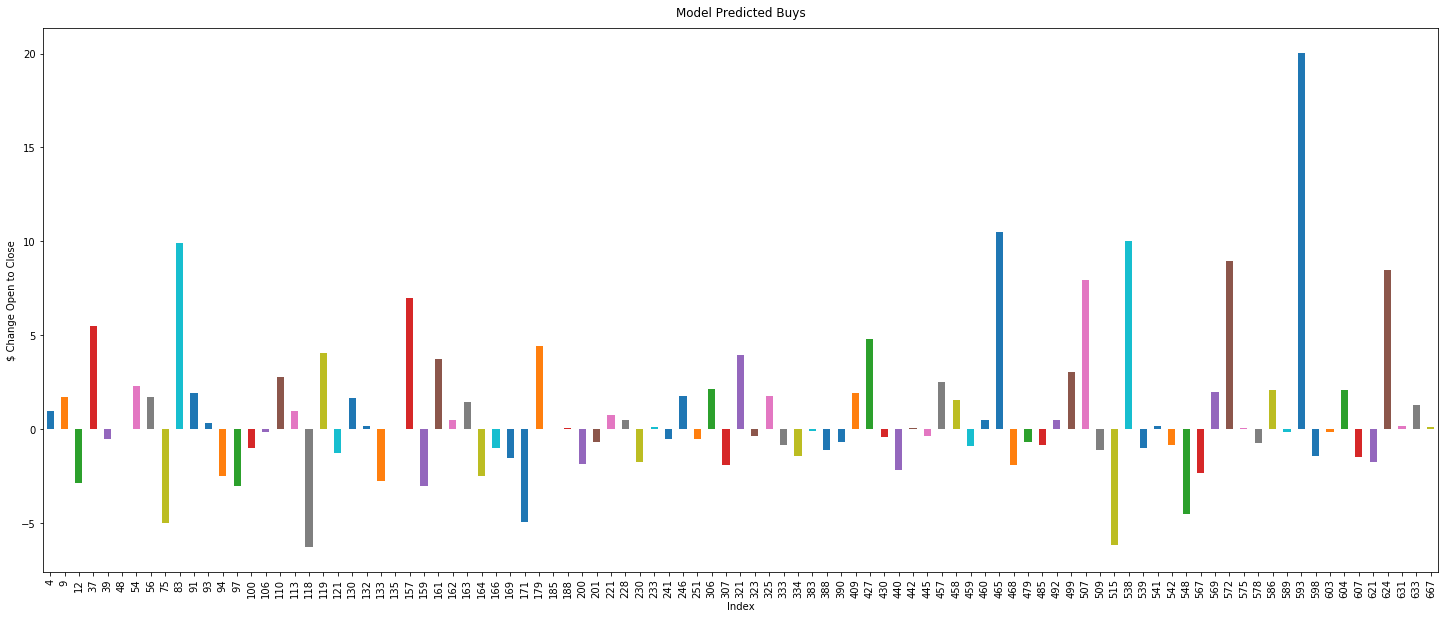

In [362]:
fig, ax = plt.subplots(figsize=(25,10))
resultsDF[resultsDF['Predicted']==1]['$ Change'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y= 1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

## We can observe that our selection pool of IPOs went from 21 to 97 
## And our mean dropped from gain dropped from 2 dollar to 94 cents 
## Our model accuracy also went down from 82% to 66% 

# In conclusion : 
## Even though are accuracy has gone down we are still doing better than our baseline approach which buying all the IPOs 
## With the help of the model we are able to narrow down the selection pool of IPOs from 689 to 97 


# ==============================================================

# Feature importance and Breakdown
## Since logistic regression is a proability predictor and 0.55 is the default threshold. Features contribute to increasing or decreasing the probability.
## Positive categorical Features - if present increase the probability of a positive outcome 
## Positive continuous Feature - increase in the value of this feature increases the pobability of a positive outcome 


In [364]:
featureValue = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
featureValue.columns = ['Coef', 'Feature']
featureValue.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.227940,"Q(""Lead Mgr"")[T.Robertson Stephens]"
1,0.944295,"Q(""Lead Mgr"")[T.Wachovia]"
2,0.898222,"Q(""Lead Mgr"")[T.Donaldson Lufkin & Jenrette]"
3,0.864658,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
4,0.808636,"Q(""Lead Mgr"")[T.Salomon Smith Barney]"
5,0.792872,"Q(""Lead Mgr"")[T.China International]"
6,0.763416,"Q(""Lead Mgr"")[T.ING Barings]"
7,0.695372,"Q(""Lead Mgr"")[T.Gunn Allen]"
8,0.652279,"Q(""Lead Mgr"")[T.Morgan Keegan]"
9,0.644387,"Q(""Lead Mgr"")[T.Noble International Investments]"


In [368]:
featureValue[featureValue['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.218600,"Q(""Week Day"")[T.Mon]"
13,0.001297,"Q(""Week Day"")[T.Thurs]"
14,-0.126197,"Q(""Week Day"")[T.Tues]"
15,-0.119836,"Q(""Week Day"")[T.Wed]"


## We can see that Friday is missing from this list - All feature were evaluated using Friday as baseline 